In [1]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   20180914_TD_Python.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Untitled1.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


# Base de données accidents corporels de la circulation
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/

Ce jeu de données provient d'un service public certifié
 NEC MERGITUR
Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC " administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Par rapport aux bases de données agrégées 2005-2010 et 2006-2011 actuellement disponibles sur le site www.data.gouv.fr, les bases de données de 2005 à 2016 sont désormais annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers ) au format csv.

Ces bases occultent néanmoins certaines données spécifiques relatives aux usagers et aux véhicules et à leur comportement dans la mesure où la divulgation de ces données porterait atteinte à la protection de la vie privée des personnes physiques aisément identifiables ou ferait apparaître le comportement de telles personnes alors que la divulgation de ce comportement pourrait leur porter préjudice (avis de la CADA – 2 janvier 2012).

In [2]:
%matplotlib inline

In [3]:
import pandas as pd

# Téléchargement de la documentation
https://www.data.gouv.fr/fr/datasets/r/36496bab-a042-47bf-b08b-3c7467f2bddf

# Téléchargements des données
https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e

https://www.data.gouv.fr/fr/datasets/r/e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526

https://www.data.gouv.fr/fr/datasets/r/08b77510-39c4-4761-bf02-19457264790f

https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7


In [4]:
import pandas as pd

In [5]:
types_des_colonnes ={"hrmn" : str }

In [6]:
path = "https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7"
df = pd.read_csv(path, encoding="latin1", dtype=types_des_colonnes)

In [7]:
df.head()

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col  com  \
0  201600000001  16     2     1  1445    1    2    1    8  3.0    5   
1  201600000002  16     3    16  1800    1    2    6    1  6.0    5   
2  201600000003  16     7    13  1900    1    1    1    1  6.0   11   
3  201600000004  16     8    15  1930    2    2    1    7  3.0  477   
4  201600000005  16    12    23  1100    1    2    3    1  3.0   11   

                   adr gps  lat  long  dep  
0   46, rue Sonneville   M  0.0   0.0  590  
1  1a rue du cimetière   M  0.0   0.0  590  
2                  NaN   M  0.0   0.0  590  
3   52 rue victor hugo   M  0.0   0.0  590  
4     rue Joliot curie   M  0.0   0.0  590

In [8]:
df.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn        object
lum          int64
agg          int64
int          int64
atm          int64
col        float64
com          int64
adr         object
gps         object
lat        float64
long       float64
dep          int64
dtype: object

In [9]:
def make_string_4_car(string):
    while len(string)<4:
        string = "0" + string
    return string

In [10]:
def test_make_string_4_car():
    
    function = make_string_4_car
    input_ = "4"
    expected_output = "0004"
    assert(function(input_) == expected_output)
    
    input_ = "0004"
    expected_output = "0004"
    assert(function(input_) == expected_output)
    
test_make_string_4_car()

In [11]:
df.hrmn = df.hrmn.map(make_string_4_car)

# Matplotlib : la librairie standard est originale de python

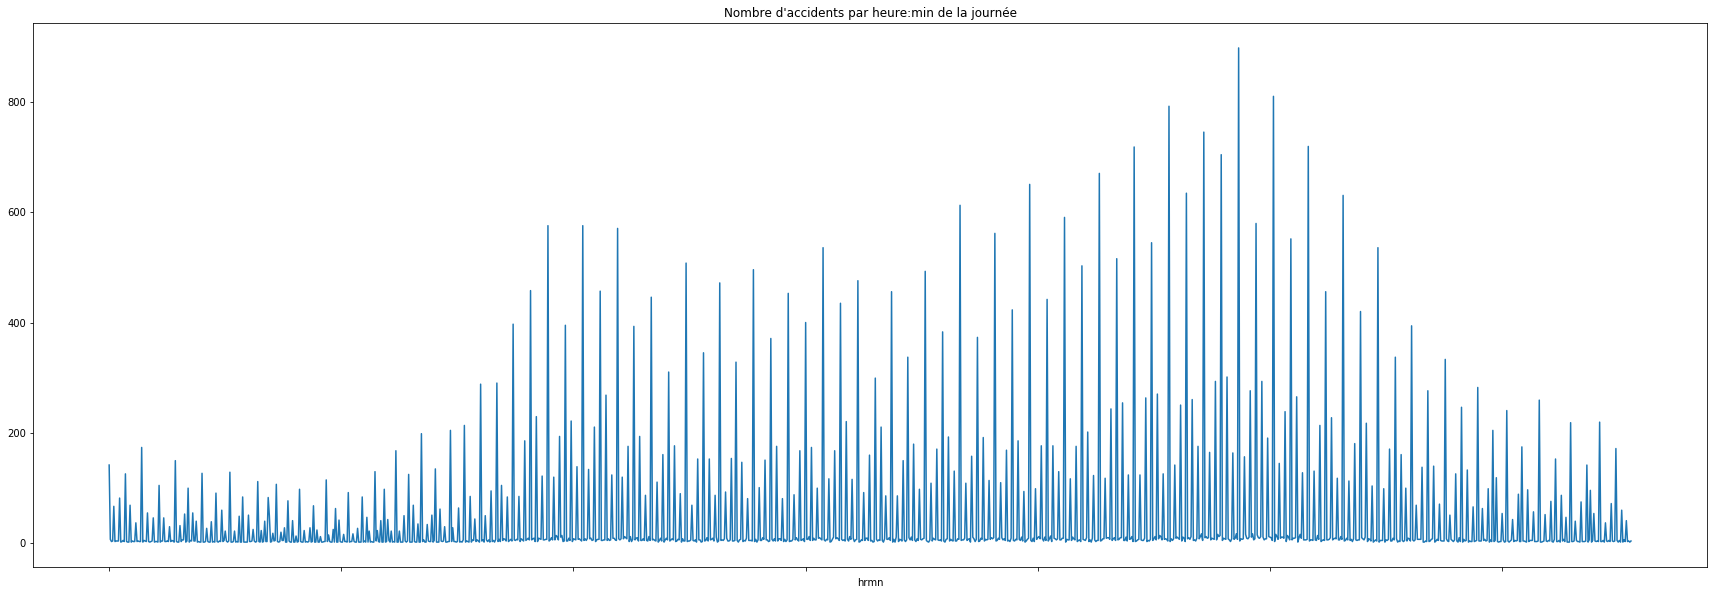

In [12]:
title = "Nombre d'accidents par heure:min de la journée"
_ = df.groupby("hrmn")["Num_Acc"].count()
_.plot(title=title, figsize=(30,10))

# Syntaxe d'extraction d'élèments en fin ou début de tableau => [:]

In [13]:

"ceci est un tableau de caractères"[-2:]
"ceci est un tableau de caractères"[:-2]


'ceci est un tableau de caractèr'

In [14]:
df["is_in_quart_d_heure"] = df.hrmn.map(lambda x: x[-2:] in ["00", "15", "30", "45"])

In [15]:
df.is_in_quart_d_heure.sum()

33916

# Bokeh : la nouvelle librairie d'analyse de données

In [16]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.transform import linear_cmap
from bokeh.palettes import Spectral6
output_notebook()

Loading BokehJS ...

In [17]:
_       = df.groupby("hrmn")["Num_Acc"].count()
_2      = _.reset_index()
_2.hrmn = _2.hrmn.map(int)

In [18]:
x_y          = ("(x,y)" , "($x, $y)")
hrmn_num_Acc = ("hrmn, num_acc", "@hrmn : @Num_Acc")
tooltips     = [ hrmn_num_Acc] 

In [19]:
mapper = linear_cmap(field_name = "Num_Acc", 
                     palette    = Spectral6 ,
                     low        = min(_2.Num_Acc) ,
                     high       = max(_2.Num_Acc))

In [21]:
p = figure()
p.circle(x="hrmn", y="Num_Acc", source=_2, color=mapper)
show(p)

# 1) Modification des noms de colonnes

In [22]:
df.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep',
       'is_in_quart_d_heure'],
      dtype='object')

## 1.1) méthode 1

In [25]:
nouvelles_colonnes = ["Num_Acc", "an", "mois", "jour", "hrmn", 
                      "lumiere", "agglomeration", "intersection", 
                      "meteo", 'collision', 'num_commune', 'adr', 
                      'gps', 'lat', 'long', 'dep', "is_in_quart_d_heure"]

In [26]:
df.columns = nouvelles_colonnes

In [27]:
df.sample().T

38282
Num_Acc                          201600038283
an                                         16
mois                                        8
jour                                       16
hrmn                                     1300
lumiere                                     1
agglomeration                               2
intersection                                2
meteo                                       1
collision                                   2
num_commune                                36
adr                  0, GRESILLONS (QUAI DES)
gps                                       NaN
lat                                       NaN
long                                      NaN
dep                                       920
is_in_quart_d_heure                      True

In [28]:
!git add 20180914_TD_Python.ipynb
!git commit -m "next"
!git push origin

[master f48a93d] next
 1 file changed, 21 insertions(+), 21 deletions(-)
Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 444 bytes | 444.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romainjouin/formation_python
   0b75b57..f48a93d  master -> master


## 1.1) méthode 2

In [29]:
colonnes_a_changer = {"lat" :"lattitude", "long" : "longitude"}
df.rename(columns=colonnes_a_changer, inplace=True)

# 2) analyse

In [33]:
# les num acc sont ils uniques ? 
df.Num_Acc.is_unique

True

In [34]:
# nombre d'accidents par typologie meteo
df.groupby("meteo")["Num_Acc"].count().sort_values()

meteo
6      144
4      159
9      300
5      621
7      667
3     1422
8     1640
2     6582
1    47897
Name: Num_Acc, dtype: int64

# 2.1) passer de catégories chiffrées à des labels

In [35]:
label_meteo = {
1 : "Normale",
2 : "Pluie légère",
3 : "Pluie forte",
4 : "Neige - grêle",
5 : "Brouillard - fumée",
6 : "Vent fort - tempête",
7 : "Temps éblouissant",
8 : "Temps couvert",
9 : "Autre",}

In [36]:
label_meteo

{1: 'Normale',
 2: 'Pluie légère',
 3: 'Pluie forte',
 4: 'Neige - grêle',
 5: 'Brouillard - fumée',
 6: 'Vent fort - tempête',
 7: 'Temps éblouissant',
 8: 'Temps couvert',
 9: 'Autre'}

In [37]:
df["label_meteo"] = df.meteo.map(label_meteo)

In [38]:
df.sample(3).T

37658         44677         8594 
Num_Acc                          201600037659  201600044678  201600008595
an                                         16            16            16
mois                                        2             3            11
jour                                        8            10            20
hrmn                                     0845          0550          1500
lumiere                                     1             2             1
agglomeration                               2             1             1
intersection                                1             1             1
meteo                                       1             1             1
collision                                   3             5             1
num_commune                                23            28            73
adr                  533, GENERAL DE GAULLE (       A86 EXT           NaN
gps                                       NaN             M             M
lattitude                                 NaN    4.8794e+06             0
longitude                                 NaN        244200             0
dep                                       920           940           840
is_in_quart_d_heure                      True         False          True
label_meteo                           Normale       Normale       Normale

In [39]:
#compter le nombdre d'accident par type de label météo
df.groupby("label_meteo")["Num_Acc"].count().sort_values()

label_meteo
Vent fort - tempête      144
Neige - grêle            159
Autre                    300
Brouillard - fumée       621
Temps éblouissant        667
Pluie forte             1422
Temps couvert           1640
Pluie légère            6582
Normale                47897
Name: Num_Acc, dtype: int64

In [40]:
# nombre d'accidents ? 
df.Num_Acc.count()

59432

In [41]:
#nombre d'accidents par heure de la journee
len(df.hrmn.unique())

1312

In [42]:
nb_de_minutes_par_jour = 60 * 24
nb_de_minutes_par_jour

1440

In [43]:

df.sample(3).T

51144                   53919          30689
Num_Acc                    201600051145            201600053920   201600030690
an                                   16                      16             16
mois                                  7                       6              7
jour                                 16                      28             14
hrmn                               2115                    1350           1445
lumiere                               2                       1              1
agglomeration                         2                       2              1
intersection                          2                       2              1
meteo                                 7                       1              1
collision                             6                       6              3
num_commune                         101                     113             49
adr                  156, RUE DE RIVOLI  65, RUE DE LA GLACIERE  la pichardais
gps                                   M                       M              M
lattitude                   4.88609e+06             4.88311e+06    4.85682e+06
longitude                        234079                  234421        -220877
dep                                 750                     750            220
is_in_quart_d_heure                True                   False           True
label_meteo           Temps éblouissant                 Normale        Normale

In [45]:
df.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lumiere', 'agglomeration',
       'intersection', 'meteo', 'collision', 'num_commune', 'adr', 'gps',
       'lattitude', 'longitude', 'dep', 'is_in_quart_d_heure', 'label_meteo'],
      dtype='object')

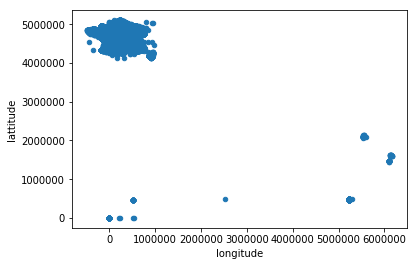

In [46]:
df.plot.scatter(x="longitude", y="lattitude")

In [48]:
p = figure()
p.circle(x="longitude", y="lattitude", source=df)
show(p)

# Analyse des départements

In [49]:
df.dep.nunique()

101

In [50]:
# Nb d'accidents par département
df.groupby("dep")["Num_Acc"].count().sort_values()

dep
230      55
480      59
550      78
150      92
700      94
90      100
520     103
460     105
430     108
900     109
80      109
50      113
390     126
810     132
650     135
530     136
160     145
730     152
320     153
820     161
40      162
201     167
180     172
190     186
280     187
880     188
610     189
120     194
400     195
976     195
       ... 
560     584
420     599
620     617
170     626
290     629
380     634
540     660
440     692
370     708
340     728
640     741
760     755
490     756
830     786
670     818
770     838
780     854
350     862
310     965
950    1120
590    1181
60     1409
910    1419
330    1641
690    2026
940    2721
920    2873
930    3031
130    4110
750    6466
Name: Num_Acc, Length: 101, dtype: int64

In [58]:
df["h"] = df.hrmn.apply(lambda x: x[:2])
df["m"] = df.hrmn.apply(lambda x: x[2:])

# La notion d'axis dans les dessins matplotlib

In [59]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure.
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

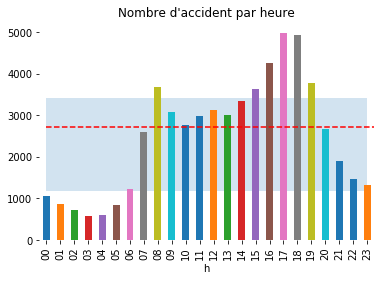

In [60]:
title    = "Nombre d'accident par heure"
to_plot  = df.groupby("h")["Num_Acc"].count()
ax       = to_plot.plot.bar(title=title)
ax.hlines(to_plot.median(), 0, 24, colors="red", linestyles="dashed")
despine_ax(ax)
ax.fill_between(range(24), to_plot.quantile(0.25), to_plot.quantile(0.75), alpha=0.2)

# Gestion des nuls

In [61]:
# Compter les nuls
df.adr.isnull().sum()

9169

In [62]:
df.adr.fillna("inconnu")

0              46, rue Sonneville
1             1a rue du cimetière
2                         inconnu
3              52 rue victor hugo
4                rue Joliot curie
5         Rue Jean-baptiste LEBAS
6                 rue Jules FERRY
7                         inconnu
8                            rn41
9                         inconnu
10              141 rue nationale
11                        inconnu
12               84 rue nationale
13                         CD 917
14                        inconnu
15                        inconnu
16                        inconnu
17            RUE DE LA MOUSSERIE
18                        inconnu
19             rue Emile Macquart
20           RD954 RUE EMILE ZOLA
21              Rte de Lederzeele
22                        inconnu
23                        inconnu
24                        inconnu
25              56 RUE PAUL MACHY
26        ave François Mitterrand
27                        inconnu
28                        inconnu
29            

# Regardons les départements

In [63]:

df.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lumiere', 'agglomeration',
       'intersection', 'meteo', 'collision', 'num_commune', 'adr', 'gps',
       'lattitude', 'longitude', 'dep', 'is_in_quart_d_heure', 'label_meteo',
       'h', 'm'],
      dtype='object')

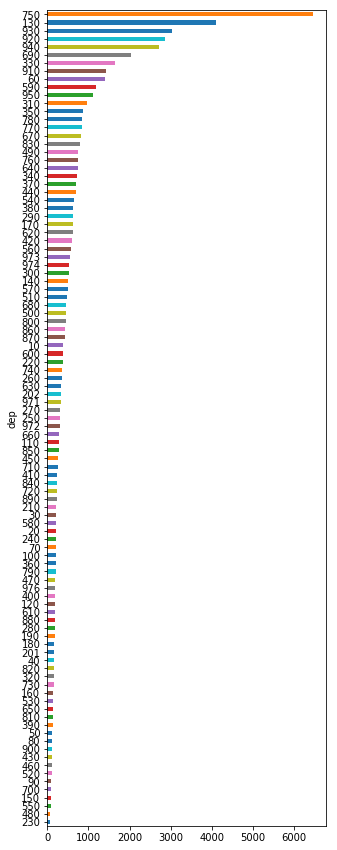

In [64]:
to_plot = df.groupby("dep")["Num_Acc"].count().sort_values()
to_plot.plot.barh(figsize=(5,15))

# Tableau croisé dynamique

In [65]:
tab = df.pivot_table(index="dep", 
               columns="h", 
               values="Num_Acc", 
               aggfunc="count",
               fill_value=0)

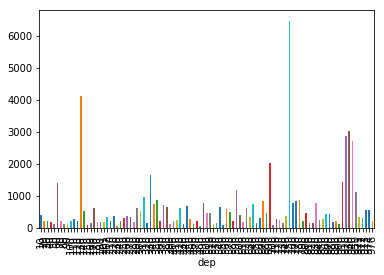

In [66]:
tab.sum(axis=1).sort_index().plot.bar()

In [67]:
import seaborn as sns

In [68]:
from matplotlib.colors import LogNorm

In [69]:
tab.max().max()

450

In [70]:
tab_sans_zero = tab.replace(0, 1)

In [71]:
idf = tab_sans_zero[tab_sans_zero.index.isin([770, 780, 910, 920, 930, 940, 950, 750])]

In [72]:
province = tab_sans_zero[~tab_sans_zero.index.isin([770, 780, 910, 920, 930, 940, 950, 750])]

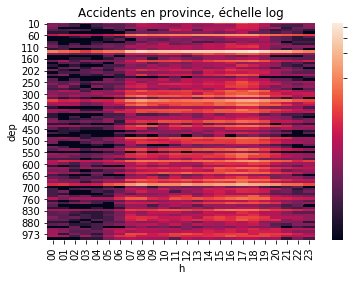

In [73]:
title = "Accidents en province, échelle log"
norm=LogNorm(vmin=2, vmax=8000)
ax = sns.heatmap(province,norm=norm)
ax.set_title(title);

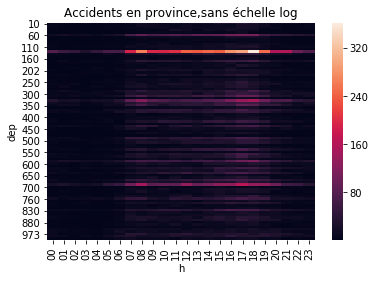

In [74]:
title = "Accidents en province,sans échelle log"
norm=LogNorm(vmin=2, vmax=8000)
ax = sns.heatmap(province)
ax.set_title(title);

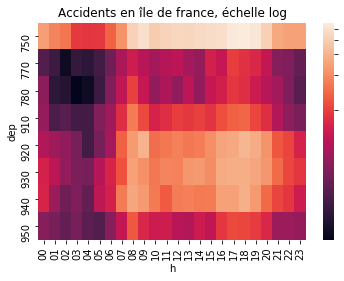

In [75]:
title = "Accidents en île de france, échelle log"
norm=LogNorm(vmin=2, vmax=8000)
ax = sns.heatmap(idf,norm=norm)
ax.set_title(title);

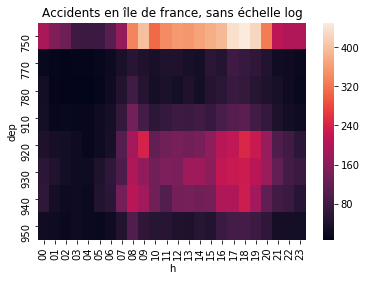

In [76]:
title = "Accidents en île de france, sans échelle log"
norm=LogNorm(vmin=2, vmax=8000)
ax = sns.heatmap(idf)#,norm=norm)
ax.set_title(title);

In [78]:

!git add esilv_groupe_1_accidents_de_la_route

fatal: pathspec 'esilv_groupe_1_accidents_de_la_route' did not match any files
